## Libraries

First, we need to load a few libraries:

- [matplotlib](http://python-graph-gallery.com/matplotlib/): for creating the chart
- [pandas](http://python-graph-gallery.com/pandas/): for data manipulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

Our dataset is about the number of **people having a certain name**, and the evolution of this number over the years. Let's load it with pandas:

In [3]:
# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv")
df.head()

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
1,1880,F,Amanda,241,0.002469
2,1880,F,Betty,117,0.001199
3,1880,F,Dorothy,112,0.001147
4,1880,F,Linda,27,0.000277


Our goal here is to explore the evolution of the number of people named "Ashley" and "Amanda" over the years in a **single scatter plot**.

For this, we need to change a bit the dataset:

- **filter** on those 2 names
- **filter** on only date after 1970
- **pivot** the table to have the names as columns and the years as rows, using the `pivot_table()` function

In [4]:
# filter data
df = df.loc[(df.name=="Ashley") | (df.name=="Amanda")]
df = df.loc[(df.sex=="F") & (df.year>1970)]
df = pd.pivot_table(df, values='n', index=['year'], columns=['name'])

df.head()

name,Amanda,Ashley
year,,
1971,4133.0,1164.0
1972,4181.0,1176.0
1973,5627.0,1253.0
1974,7476.0,1626.0
1975,12653.0,1988.0


## Connected scatterplot for evolution

In practice, we just have to call the `plot()` function with our columns as arguments. We specify that `markers` have to be used with `marker='o'` and that the **lines have to be connected** with `linestyle='-'`.

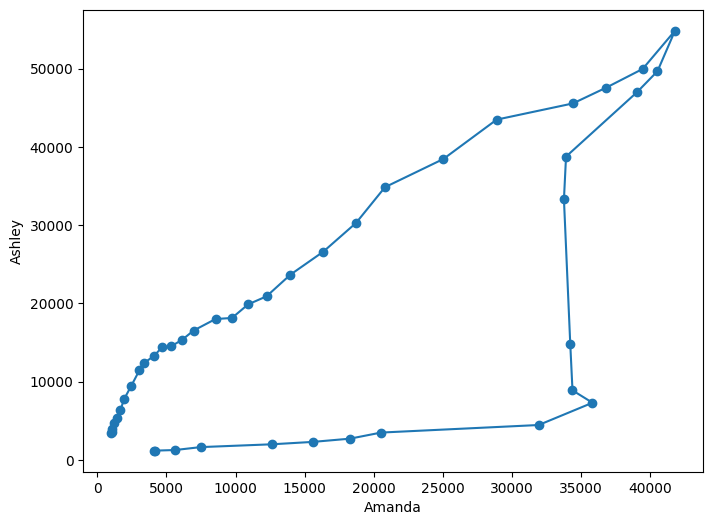

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot the connected scatterplot
ax.plot(df.Amanda, df.Ashley, linestyle='-', marker='o')

# x axis label
plt.xlabel('Amanda')

# y axis label
plt.ylabel('Ashley')

# show the graph
plt.show()

## Annotations

Our last chart has a major issue: we don't know **which year is represented by each point**.

To fix this, we can use the `annotate()` function to add a **text next to each point**. However, it's not necessary to add all the years, and decide to **only plot 1 out of 3 years**.

In practice, we **loop over the number of rows** with a step of 3 (thanks to `range(0, len(df), 3)`) and add an annotation with the `annotate()` function.

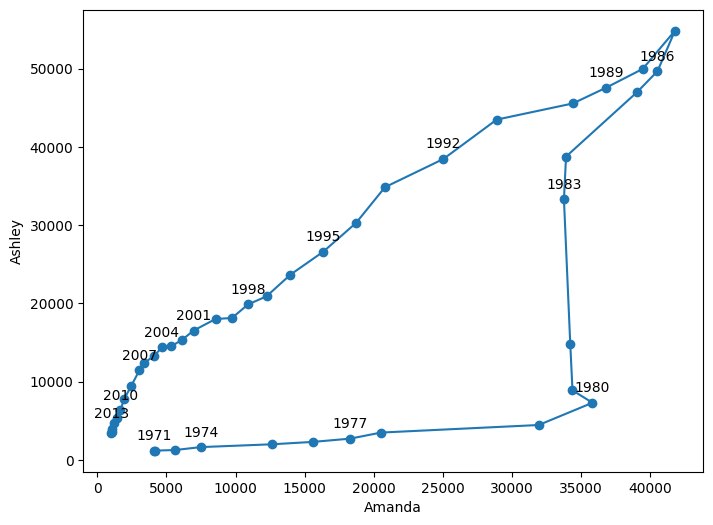

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot the connected scatterplot
ax.plot(df.Amanda, df.Ashley, linestyle='-', marker='o')

# add annotations in every 3 data points with a loop
for line in range(0, df.shape[0], 3):
     ax.annotate(
          df.index[line], 
          (df.Amanda.iloc[line], df.Ashley.iloc[line]+1000) ,
          va='bottom',
          ha='center'
     )

# labels and display
plt.xlabel('Amanda')
plt.ylabel('Ashley')
plt.show()

What a nice way to visualize the evolution of the number of people named Ashley and Amanda over the years!

## Going further

This post explains how to create a [connected scatterplot](http://python-graph-gallery.com/connected-scatterplot/) with [matplotlib](http://python-graph-gallery.com/matplotlib/).

You might be interested in how to reproduce this [beautiful connected scatter plot](http://python-graph-gallery.com/web-highlighted-lineplot-with-faceting/) and how to create [multiple connected scatter plots](http://python-graph-gallery.com/508-connected-scatter-plot-seaborn/) on the same chart.